# A Preview of Data Science Tools

If you would like to go farther in using Python for scientific computing or analytics, there are a few packages that will make your life much easier.

This section will introduce and preview some of the most important ones, and give you an idea of the types of applications they are designed for.
If you're using the *Anaconda* or *Miniconda* environment suggested at the beginning of this class, you can install the relevant packages with the following command:
```
$ conda install numpy scipy pandas matplotlib scikit-learn
```

If you are using Google Colab all these packages are already pre-installed.

Let's take a brief look at each of these in turn.

## NumPy: Numerical Python

NumPy provides an efficient way to store and manipulate multi-dimensional dense arrays in Python.
The important features of NumPy are:

- It provides an ``ndarray`` structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
- It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

In the simplest case, NumPy arrays look a lot like Python lists.
For example, here is an array containing the range of numbers 1 to 9 (compare this with Python's built-in ``range()``):

In [1]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

NumPy's arrays offer both efficient storage of data, as well as efficient element-wise operations on the data.
For example, to square each element of the array, we can apply the "``**``" operator to the array directly:

In [2]:
x ** 2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

Compare this with the much more verbose Python-style list comprehension for the same result:

In [3]:
[val ** 2 for val in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

When comparing the efficiency of squaring each element in a list using list comprehension versus using NumPy arrays, NumPy operations are significantly faster. This speed advantage arises because NumPy arrays are implemented in C, allowing for highly optimized operations at the hardware level, and they leverage contiguous memory storage, leading to better cache utilization. In contrast, Python's list comprehension involves a loop that iterates through each element and performs the squaring operation in Python, which is inherently slower due to the overhead of Python's interpreted nature and the way lists store heterogeneous elements in memory. Thus, for computationally intensive tasks or operations on large datasets, NumPy arrays provide a substantial performance boost over standard Python lists.

Let's measure and compare their performance:

In [4]:
size = 1000000  # Size of the list and array
x_list = list(range(size))
x_array = np.arange(size)

# Using %timeit magic command to compare performance and store the output
list_time = %timeit -o [x ** 2 for x in x_list]
numpy_time = %timeit -o x_array ** 2

# Calculating the ratio of list comprehension time to NumPy time
time_ratio = list_time.average / numpy_time.average
print(f"List comprehension is {time_ratio:.1f} times slower than NumPy for squaring elements.")

91.9 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
732 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
List comprehension is 125.6 times slower than NumPy for squaring elements.


Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional.
For example, here we will reshape our ``x`` array into a two-dimensional 3x3 array:

In [5]:
M = x.reshape((3, 3))
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can compute the transpose using ``.T``:

In [6]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

or a matrix-vector product using ``np.dot``:

In [7]:
np.dot(M, [5, 6, 7])

array([ 38,  92, 146])

and even more sophisticated operations like eigenvalue decomposition:

In [8]:
np.linalg.eigvals(M)

array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15])

Such linear algebraic manipulation underpins much of modern data analysis, particularly when it comes to the fields of machine learning and data mining.

## Pandas: Labeled Column-oriented Data

Pandas (2009) is newer than NumPy (2005), and is in fact built on top of it.
What Pandas provides is a labeled interface to multi-dimensional data, in the form of a DataFrame object that will feel very familiar to users of R, Excel, and databases.

DataFrames in Pandas look something like this:

In [9]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'col2': [1, 2, 3, 4, 5, 6]})
df

,col1,col2
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


The Pandas interface allows you to do things like select columns by name:

In [10]:
df['col1']

,col1
0,A
1,B
2,C
3,A
4,B
5,C


Apply string operations across string entries:

In [11]:
df['col1'].str.lower()

,col1
0,a
1,b
2,c
3,a
4,b
5,c


Apply aggregates across numerical entries:

In [12]:
df['col2'].sum()

np.int64(21)

And, perhaps most importantly, do efficient database-style joins and groupings:

In [13]:
df.groupby('col1').sum()

,col2
col1,
A,5
B,7
C,9


In pandas, we can quickly calculate the sum of all items that have the same label with just one line of code. Doing the same thing with NumPy or basic Python would take more lines of code and would not be as efficient.

## Matplotlib MatLab-style scientific visualization

Matplotlib is one of the most popular scientific visualization packages in Python.
Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

To use Matplotlib, we can start by enabling the notebook mode (for use in the Jupyter notebook) and then importing the package as ``plt``".

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # make graphs in the style of R's ggplot

Now let's create some data (as NumPy arrays, of course) and plot the results:

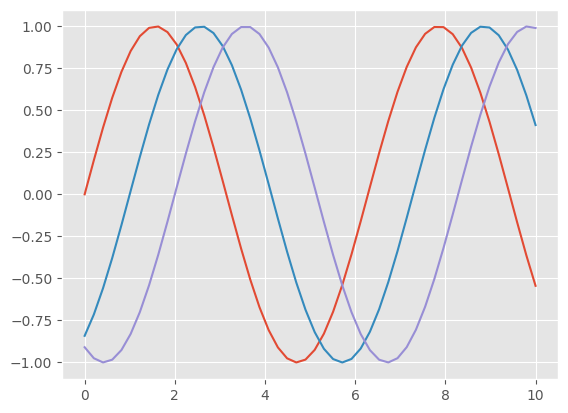

In [15]:
x = np.linspace(0, 10)  # range of 50 values from 0 to 10
plt.plot(x, np.sin(x - 0));         # plot as a line
plt.plot(x, np.sin(x - 1));     # plot as a line
plt.plot(x, np.sin(x - 2));     # plot as a line

### Matplotlib method on pandas DataFrame

It is also possible to create a plot directly from a pandas dataframe. For instance, below we create a chart off of our synthetic DataFrame `df`:

In [20]:
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=pd.date_range(end=pd.Timestamp.today().normalize(), periods=1000),
    columns=list('ABCD')
)

df = df.cumsum()

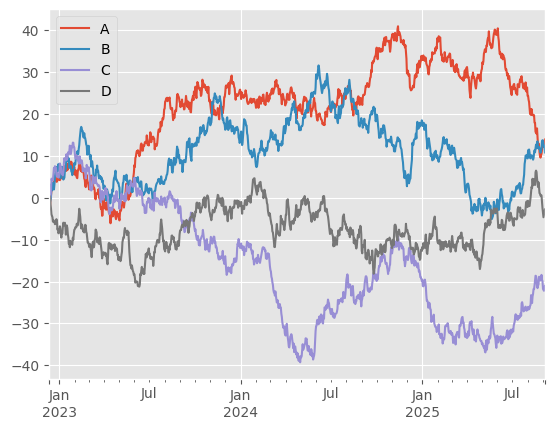

In [21]:
df.plot();

This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib's online gallery](http://matplotlib.org/gallery.html). We will come back to Matplotlib in the future classes.

## Other Data Science Packages

Built on top of foundational tools like NumPy, pandas, and matplotlib, a range of data science packages is specifically designed for business and data analytics. These include general-purpose tools like [Scikit-Learn](http://scikit-learn.org) for machine learning and predictive modeling, [Missingno](https://github.com/ResidentMario/missingno) for visualizing and diagnosing missing data patterns in datasets, and [Seaborn](https://seaborn.pydata.org/) for creating statistical visualizations that are both informative and aesthetically pleasing. For handling large-scale data manipulation tasks, [Koalas](https://koalas.readthedocs.io/en/latest/) provides a familiar pandas-like API on top of Apache Spark, allowing for scalable and efficient data transformation.

No matter what type of business analytics, data cleaning, visualization, or machine learning problem you are facing, it's likely there is a Python package tailored to help you solve it efficiently and effectively.